In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']
heart = pd.read_csv(url, names = names)
heart.head(5).append(heart.tail(5)) 

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [3]:
heart.shape

(303, 14)

In [4]:
heart.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n'], dtype='object')

In [5]:
heart.head(5).append(heart.tail(5)) 

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [6]:
heart.n.unique()

array([0, 2, 1, 3, 4])

In [0]:
heart['attack_risk'] = np.where(heart['n']==0, 0, 1) 

In [8]:
heart.head(5).append(heart.tail(5))

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,attack_risk
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0,0


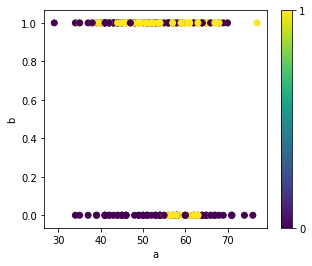

In [10]:
le = preprocessing.LabelEncoder()
le.fit(heart.attack_risk.drop_duplicates())
heart.attack_risk = le.transform(heart.attack_risk)


x=0;y=1;
# change x and y values to see scatter plots of different features

plt.figure(figsize=(5, 4))
plt.scatter(heart.iloc[:, x], heart.iloc[:, y],c=heart.attack_risk)
plt.colorbar(ticks=[0, 1])
plt.xlabel(names[x]);
plt.ylabel(names[y]);

In [11]:
heart.attack_risk.unique()

array([0, 1])

In [12]:
corr = heart.corr()
corr

,a,b,c,d,e,f,g,h,i,j,k,n,attack_risk
a,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.222853,0.223120
b,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.224469,0.276816
c,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.407075,0.414446
d,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.157754,0.150825
e,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.070909,0.085164
f,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.059186,0.025264
g,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.183696,0.169202
h,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.415040,-0.417167
i,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.397057,0.431894
j,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.504092,0.424510


In [0]:
cr = corr.copy()

In [0]:
top_corr_columns = []

In [15]:
top_corr_columns = cr.loc[:, 'attack_risk'][:-1]
best_accurate_columns = top_corr_columns[abs(top_corr_columns) > 0.2].sort_values(ascending=False)
len(best_accurate_columns)

8

In [16]:
best_accurate_columns

n    0.830081
i    0.431894
j    0.424510
c    0.414446
k    0.339213
b    0.276816
a    0.223120
h   -0.417167
Name: attack_risk, dtype: float64

In [17]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
a              303 non-null float64
b              303 non-null float64
c              303 non-null float64
d              303 non-null float64
e              303 non-null float64
f              303 non-null float64
g              303 non-null float64
h              303 non-null float64
i              303 non-null float64
j              303 non-null float64
k              303 non-null float64
l              303 non-null object
m              303 non-null object
n              303 non-null int64
attack_risk    303 non-null int64
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [18]:
pip install sns

In [0]:
import seaborn as sns

count    303.000000
mean       0.458746
std        0.499120
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: attack_risk, dtype: float64


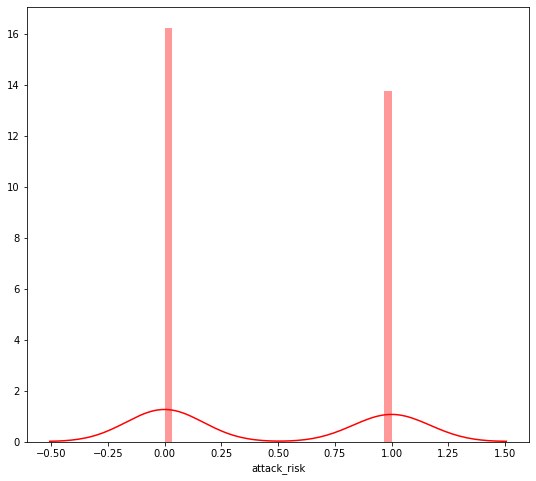

In [20]:
print(heart['attack_risk'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(heart['attack_risk'], color='r', bins=30, hist_kws={'alpha': 0.4});

In [0]:
train_df = heart[best_accurate_columns.keys()]

In [22]:
train_df = train_df.drop('n', axis=1)
train_df.head(2)

,i,j,c,k,b,a,h
0,0.0,2.3,1.0,3.0,1.0,63.0,150.0
1,1.0,1.5,4.0,2.0,1.0,67.0,108.0


In [0]:
#make an array of min_samples_leaf to choose from 1 to 100
num_leafs = [1, 2, 3, 4, 5, 7, 10, 20, 50, 100]

In [0]:
y = heart.attack_risk

In [0]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split

In [0]:
X = train_df.iloc[:,0:7]
y = heart.iloc[:,14]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [91]:
X_train

,i,j,c,k,b,a,h
33,0.0,0.5,4.0,2.0,1.0,59.0,161.0
123,1.0,5.6,4.0,3.0,1.0,55.0,111.0
61,1.0,1.4,3.0,3.0,0.0,46.0,160.0
228,1.0,0.0,4.0,2.0,1.0,54.0,108.0
128,0.0,0.0,2.0,1.0,1.0,44.0,170.0
...,...,...,...,...,...,...,...
58,0.0,0.5,3.0,3.0,1.0,54.0,152.0
87,0.0,0.0,3.0,1.0,0.0,53.0,115.0
197,1.0,0.2,4.0,2.0,0.0,45.0,152.0
174,0.0,2.0,4.0,2.0,1.0,64.0,132.0


In [92]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: attack_risk, Length: 303, dtype: int64

In [0]:
#GridSearch to determine best parameters
param_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':num_leafs,
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
}

In [0]:
gsm = GridSearchCV(KNeighborsClassifier(),
                                 param_grid=param_grid,
                                 verbose = 1,
                                 cv=5,
                                 #n_jobs = -1,
                                 refit=True)


In [108]:
now = datetime.now()
print(now)
gsm_result = gsm.fit(X_train, y_train)
end = datetime.now()
print(end)
print(end-now)

2019-11-25 14:30:31.687096
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2019-11-25 14:30:40.666046
0:00:08.978950


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    9.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [109]:
print(gsm.best_score_)

0.7058823529411765


In [110]:
best_params_ = gsm.best_params_
best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'manhattan',
 'weights': 'uniform'}

In [111]:
print(gsm.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [0]:
n_neighbors = [1,3,5,7,9]

In [0]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

KNN for k =  1
[0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1]


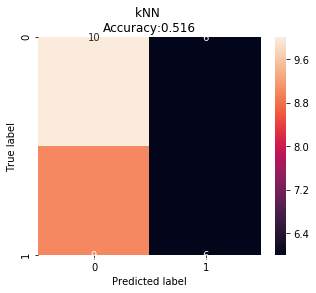

              precision    recall  f1-score   support

           0       0.53      0.62      0.57        16
           1       0.50      0.40      0.44        15

    accuracy                           0.52        31
   macro avg       0.51      0.51      0.51        31
weighted avg       0.51      0.52      0.51        31

KNN for k =  3
[1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1]


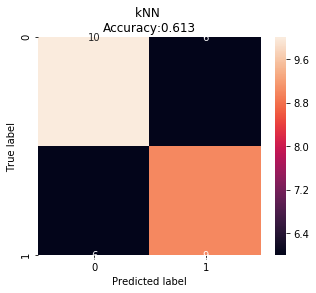

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        16
           1       0.60      0.60      0.60        15

    accuracy                           0.61        31
   macro avg       0.61      0.61      0.61        31
weighted avg       0.61      0.61      0.61        31

KNN for k =  5
[1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1]


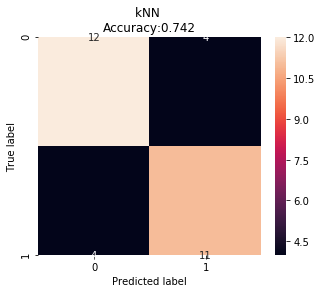

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.73      0.73      0.73        15

    accuracy                           0.74        31
   macro avg       0.74      0.74      0.74        31
weighted avg       0.74      0.74      0.74        31

KNN for k =  7
[1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1]


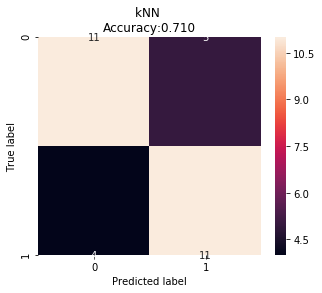

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       0.69      0.73      0.71        15

    accuracy                           0.71        31
   macro avg       0.71      0.71      0.71        31
weighted avg       0.71      0.71      0.71        31

KNN for k =  9
[1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1]


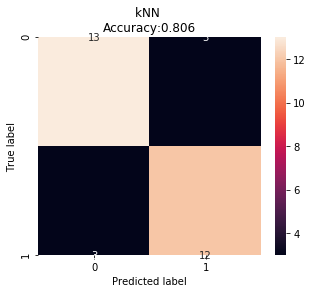

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.80      0.80      0.80        15

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31



In [118]:
for k in n_neighbors:
  best_KNC = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=k, p=2,
                     weights='uniform')
  best_KNC = best_KNC.fit(X_train, y_train)
  risk_predictor = best_KNC.predict(X_test)
  print("KNN for k = ", k)
  print(risk_predictor)

  cm = confusion_matrix(y_test, risk_predictor) 
  cm_df = pd.DataFrame(cm,
                     index = [0, 1], 
                     columns = [0, 1])

  plt.figure(figsize=(5,4))
  sns.heatmap(cm_df, annot=True)
  plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, risk_predictor)))
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

  print(classification_report(y_test, risk_predictor))

In [119]:
print(classification_report(y_test, risk_predictor))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.80      0.80      0.80        15

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31

